Our goal is to predict distribution characteristics from corrupted databases
This is an essay on a statistical method for rooting out bad samples from a large statistic

In [88]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import random as rd
rd.seed = 73

In [89]:
def CreateHistogram(values, buckets):
    minValue = min(values)
    maxValue = max(values)
    bCounts = [0 for _ in range(buckets)]
    for v in values:
        valueBox = (v - minValue)*buckets/(maxValue - minValue)
        valueBox = math.floor(valueBox)
        if valueBox >= buckets:
            valueBox = buckets - 1
        bCounts[valueBox] += 1
    return bCounts, [minValue + i*(maxValue - minValue) for i in range(buckets + 1)]

For our running example, assume a random variable follows a [Pareto distribution type I](https://en.wikipedia.org/wiki/Pareto_distribution) X ~ PrI(rmin = 1, alpha).
Our goal is to estimate **alpha**
We draw a sample from this distribution, which will be called the good data, and will be contaminated with bad data that follows some distribution that is unknown.

Our estimator for alpha is based on the fact that the mean of X is alpha*rmin/(alpha - 1)

In [90]:
def DrawParetoDistribution(rmin = 1, alpha = 2):
    return rmin * pow(1 - rd.random(), -1/alpha)


#The following bad data sampler creates a u shaped distribution with a lot of 
#   samples concentraded on the border of the interval minValue, maxValue
#   being log-uniform in the remaning interval
DrawBadData_MINRANGE = 0.05
DrawBadData_MAXRANGE = 0.99
def DrawBadData(minValue, maxValue):
    x = rd.random()
    if x < DrawBadData_MINRANGE:
        return minValue
    if x > DrawBadData_MAXRANGE:
        return maxValue
    return math.exp(Interpolate(x, 
                       [DrawBadData_MINRANGE, DrawBadData_MAXRANGE], 
                       [math.log(minValue), math.log(maxValue)]))


def Interpolate(a, x, y):
    return  y[0] + (a - x[0])*(y[1]-y[0])/(x[1]-x[0])

We now benchmark our method.
First we generate some data following the desired distribution with a given parameter.
Then, we generate some bad data.
Then we create the buckets and sample a few 

In [91]:
#Benchmarking our method
rmin = 1
alpha = 3
sample_size = 100_000
proportion_good_data = 0.7
good_data_size = math.floor(sample_size*proportion_good_data)
bad_data_size = sample_size - good_data_size

#Create good data
good_data = [DrawParetoDistribution(rmin, alpha) for _ in range(good_data_size)]

#Create bad data
minValue = min(good_data)
maxValue = max(good_data)
bad_data = [DrawBadData(minValue, maxValue) for _ in range(bad_data_size)]

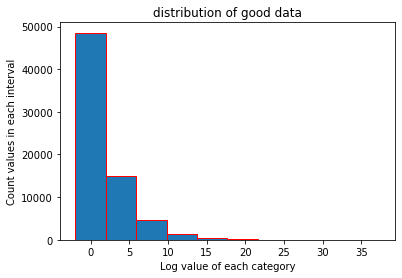

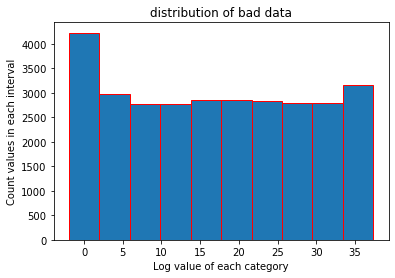

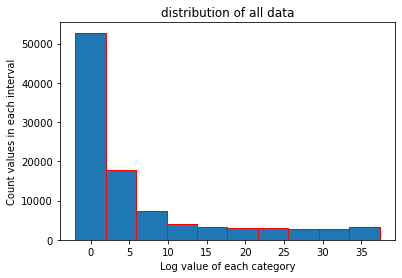

In [92]:
def PlotData(data, buckets, ttl = "a histogram"):
    logBoxCount, logBoxCutOffs = CreateHistogram([math.log(v) for v in data], buckets)
    plt.bar([logBoxCutOffs[i] for i in range(buckets)], 
            logBoxCount, 
            [logBoxCutOffs[i+1] - logBoxCutOffs[i] for i in range(buckets)],
           edgecolor = 'red')
    plt.ylabel("Count values in each interval")
    plt.xlabel("Log value of each category")
    plt.title(ttl)
    plt.show()


#Plot good data in buckets
PlotData(good_data, 10, "distribution of good data")
PlotData(bad_data, 10, "distribution of bad data")
PlotData(good_data + bad_data, 10, "distribution of all data")


## Bucket distribution method

In [ ]:
#Sample from the buckets
buckets = 10


## Value weighted method

In this method we are estimating the 

In [ ]:
#Sample according to the value weight